In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.applications import MobileNetV2

In [2]:
os.listdir('C:/Users/Akash Shukla/Desktop/LOGO')

['harry-potter',
 'index.csv',
 'jurassic-world',
 'LICENSE',
 'marvel',
 'metadata.csv',
 'star-wars']

In [9]:
dataPath ='C:/Users/Akash Shukla/Desktop/LOGO/'

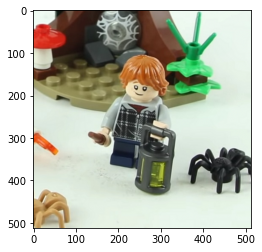

In [7]:
image = cv2.imread('C:/Users/Akash Shukla/Desktop/LOGO/harry-potter/0002/009.jpg')
image = cv2.resize(image, (512,512))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0

plt.imshow(image)

In [10]:
index_df = pd.read_csv(dataPath + 'index.csv')
index_df

,Unnamed: 0,path,class_id,train-valid
0,0,marvel/0001/001.jpg,1,train
1,1,marvel/0001/002.jpg,1,valid
2,2,marvel/0001/003.jpg,1,train
3,3,marvel/0001/004.jpg,1,train
4,4,marvel/0001/005.jpg,1,train
...,...,...,...,...
355,355,star-wars/0011/004.jpg,32,train
356,356,star-wars/0011/005.jpg,32,valid
357,357,star-wars/0011/006.jpg,32,train
358,358,star-wars/0011/007.jpg,32,valid


In [11]:
meta_df = pd.read_csv(dataPath + 'metadata.csv')
meta_df

,Unnamed: 0,class_id,lego_ids,lego_names,minifigure_name
0,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
1,1,2,[76115],['Spider Mech vs. Venom'],VENOM
2,2,3,[76115],['Spider Mech vs. Venom'],AUNT MAY
3,3,4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
4,4,5,[75208],"[""Yoda's Hut""]",YODA
5,5,6,[75208],"[""Yoda's Hut""]",LUKE SKYWALKER
6,6,7,[75208],"[""Yoda's Hut""]",R2-D2
7,7,8,[75199],"[""General Grievous' Combat Speeder""]",MACE WINDU
8,8,9,[75199],"[""General Grievous' Combat Speeder""]",GENERAL GRIEVOUS
9,9,10,[75264],"[""Kylo Ren's Shuttle Microfighter""]",KYLO REN


In [12]:
data_df = pd.merge(index_df, meta_df[['class_id', 'minifigure_name']], on='class_id')
data_df

,Unnamed: 0,path,class_id,train-valid,minifigure_name
0,0,marvel/0001/001.jpg,1,train,SPIDER-MAN
1,1,marvel/0001/002.jpg,1,valid,SPIDER-MAN
2,2,marvel/0001/003.jpg,1,train,SPIDER-MAN
3,3,marvel/0001/004.jpg,1,train,SPIDER-MAN
4,4,marvel/0001/005.jpg,1,train,SPIDER-MAN
...,...,...,...,...,...
355,355,star-wars/0011/004.jpg,32,train,JANNAH
356,356,star-wars/0011/005.jpg,32,valid,JANNAH
357,357,star-wars/0011/006.jpg,32,train,JANNAH
358,358,star-wars/0011/007.jpg,32,valid,JANNAH


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       360 non-null    int64 
 1   path             360 non-null    object
 2   class_id         360 non-null    int64 
 3   train-valid      360 non-null    object
 4   minifigure_name  360 non-null    object
dtypes: int64(2), object(3)
memory usage: 16.9+ KB


In [14]:
print("Missing Data:",data_df.isnull().any().any())
data_df.isnull().sum()

Missing Data: False


Unnamed: 0         0
path               0
class_id           0
train-valid        0
minifigure_name    0
dtype: int64

In [15]:
labels = data_df['minifigure_name'].unique()
count = data_df['minifigure_name'].value_counts()

count

SPIDER-MAN                     19
BLACK WIDOW                    14
TRACKER TRAQUEUR RASTREADOR    14
YELENA BELOVA                  14
OWEN GRADY                     14
TASKMASTER                     14
GENERAL GRIEVOUS               14
MACE WINDU                     13
HARRY POTTER                   13
RON WEASLEY                    13
OUTRIDER 1                     12
IRON MAN MK 41                 12
LUKE SKYWALKER                 12
OUTRIDER 2                     12
IRON MAN MK 5                  12
CAPTAIN AMERICA                12
IRON MAN MK 1                  12
R2-D2                          12
YODA                           12
IRON MAN MK 50                 12
VENOM                          10
KYLO REN                       10
AUNT MAY                       10
GHOST SPIDER                   10
MYSTERIO                        9
FIREFIGHTER                     9
KLATOOINIAN RAIDER 2            8
JANNAH                          8
CARA DUNE                       8
THE MANDALORIA

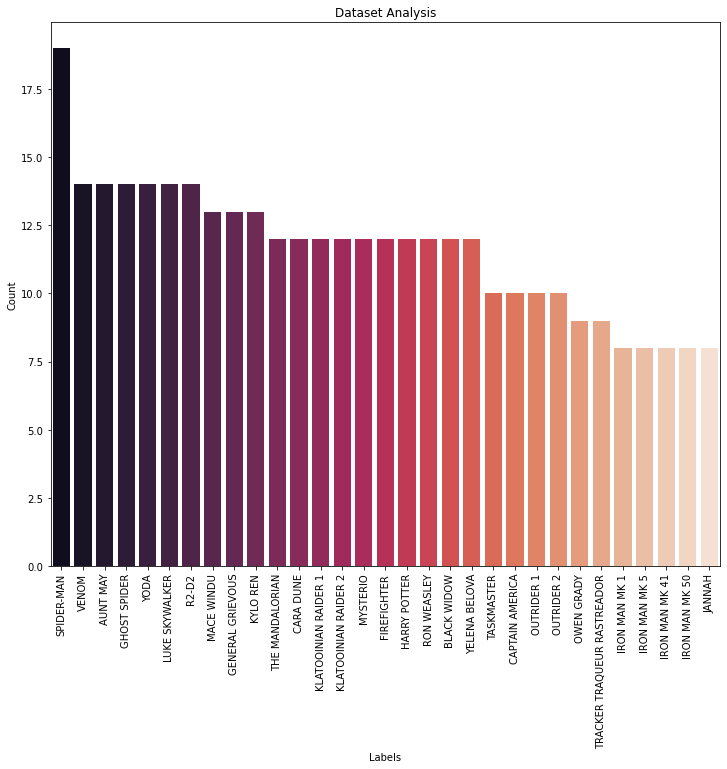

In [16]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.barplot(x=labels, y=count,palette="rocket")

plt.xticks(rotation= 90)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Dataset Analysis')
plt.show()

In [17]:
training = data_df[data_df["train-valid"] == 'train']
validation = data_df[data_df["train-valid"] == 'valid']

In [18]:
training, validation

(     Unnamed: 0                    path  class_id train-valid minifigure_name
 0             0     marvel/0001/001.jpg         1       train      SPIDER-MAN
 2             2     marvel/0001/003.jpg         1       train      SPIDER-MAN
 3             3     marvel/0001/004.jpg         1       train      SPIDER-MAN
 4             4     marvel/0001/005.jpg         1       train      SPIDER-MAN
 6             6     marvel/0001/007.jpg         1       train      SPIDER-MAN
 ..          ...                     ...       ...         ...             ...
 345         345     marvel/0017/006.jpg        31       train  IRON MAN MK 50
 353         353  star-wars/0011/002.jpg        32       train          JANNAH
 355         355  star-wars/0011/004.jpg        32       train          JANNAH
 357         357  star-wars/0011/006.jpg        32       train          JANNAH
 359         359  star-wars/0011/008.jpg        32       train          JANNAH
 
 [186 rows x 5 columns],
      Unnamed: 0         

In [19]:
#Evaluating total number of classes
CLASSES = len(data_df['class_id'].unique())
CLASSES

32

In [22]:
#Training Data Preprocessing

trainData = np.zeros((training.shape[0], 512, 512, 3))

for i in range(training.shape[0]):
    
    image = cv2.imread('C:/Users/Akash Shukla/Desktop/LOGO/' + training["path"].values[i])
    
    #Converting BGR to RGB 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Resizing image to (512 x 512)
    image = cv2.resize(image, (512,512))
    
    #Normalizing pixel values to [0,1]
    trainData[i] = image / 255.0

trainLabel = np.array(training["class_id"])-1

In [23]:
#Validation Data Preprocessing

validData = np.zeros((validation.shape[0], 512, 512, 3))

for i in range(validation.shape[0]):
    
    image = cv2.imread('C:/Users/Akash Shukla/Desktop/LOGO/' + validation["path"].values[i])
    
    #Converting BGR to RGB 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Resizing image to (512 x 512)
    image = cv2.resize(image, (512,512))
    
    #Normalizing pixel values to [0,1]
    validData[i] = image / 255.0

validLabel = np.array(validation["class_id"])-1

In [24]:
trainData, trainLabel

(array([[[[0.36862745, 0.33333333, 0.26666667],
          [0.36862745, 0.33333333, 0.26666667],
          [0.37647059, 0.34117647, 0.2745098 ],
          ...,
          [0.56078431, 0.54901961, 0.48235294],
          [0.55294118, 0.54117647, 0.4745098 ],
          [0.54901961, 0.5372549 , 0.47058824]],
 
         [[0.37647059, 0.34901961, 0.27843137],
          [0.37647059, 0.34901961, 0.27843137],
          [0.38823529, 0.35294118, 0.28627451],
          ...,
          [0.56470588, 0.55294118, 0.48627451],
          [0.56078431, 0.54901961, 0.48235294],
          [0.56078431, 0.54901961, 0.48235294]],
 
         [[0.39607843, 0.36862745, 0.29803922],
          [0.39215686, 0.36470588, 0.29411765],
          [0.40784314, 0.37254902, 0.30588235],
          ...,
          [0.56862745, 0.55686275, 0.49019608],
          [0.56862745, 0.55686275, 0.49019608],
          [0.56862745, 0.55686275, 0.49019608]],
 
         ...,
 
         [[0.31372549, 0.2745098 , 0.23529412],
          [0.27843

In [31]:
base_model = MobileNetV2()

#Adding Dropout layer
x = Dropout(0.5)(base_model.layers[-2].output)

#Adding Dense layer
outputs = Dense(CLASSES, activation='softmax')(x)

#Creating model
model = Model(base_model.inputs, outputs)

In [32]:
#Displaying model summary
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [33]:
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
#Training model - 30 epochs
hist = model.fit(
    trainData, trainLabel,
    epochs=20,
    validation_data=(validData, validLabel),
    shuffle=True,
    batch_size=4
)

Epoch 1/20
47/47 [==============================] - 20s 434ms/step - loss: 3.6115 - accuracy: 0.0430 - val_loss: 3.4919 - val_accuracy: 0.0805
Epoch 2/20
47/47 [==============================] - 15s 328ms/step - loss: 3.0211 - accuracy: 0.2097 - val_loss: 3.3547 - val_accuracy: 0.0287
Epoch 3/20
47/47 [==============================] - 15s 325ms/step - loss: 2.5735 - accuracy: 0.3441 - val_loss: 3.1556 - val_accuracy: 0.1034
Epoch 4/20
47/47 [==============================] - 15s 325ms/step - loss: 2.0742 - accuracy: 0.5430 - val_loss: 2.9838 - val_accuracy: 0.2356
Epoch 5/20
47/47 [==============================] - 15s 328ms/step - loss: 1.6379 - accuracy: 0.7043 - val_loss: 2.8611 - val_accuracy: 0.2414
Epoch 6/20
47/47 [==============================] - 15s 325ms/step - loss: 1.4236 - accuracy: 0.7581 - val_loss: 2.5630 - val_accuracy: 0.3793
Epoch 7/20
47/47 [==============================] - 15s 326ms/step - loss: 1.0774 - accuracy: 0.8495 - val_loss: 2.3699 - val_accuracy: 0.4483

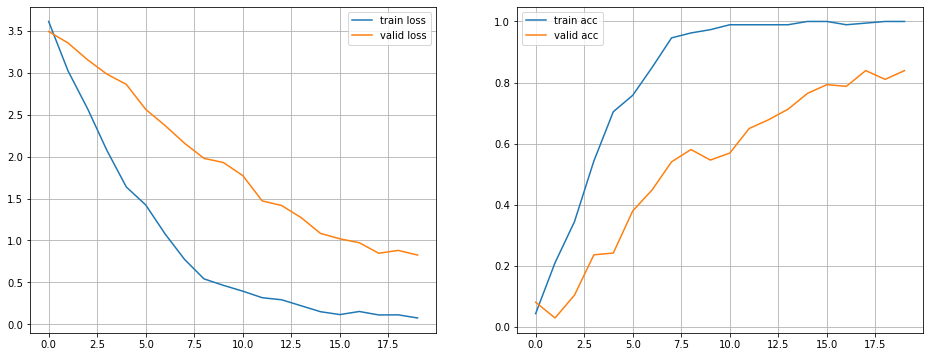

In [35]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='valid loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend()

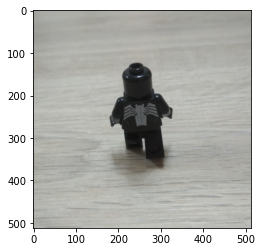

In [41]:
testImage = cv2.imread('C:/Users/Akash Shukla/Desktop/LOGO/marvel/0002/006.jpg')
testImage = cv2.resize(testImage, (512,512))
testImage = cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB) / 255.0

plt.imshow(testImage)

In [42]:
testImage = np.reshape(testImage, (1, 512, 512, 3))

predictedClass = model.predict(testImage).argmax()
predictedClass = predictedClass + 1

figureName = meta_df['minifigure_name'][meta_df['class_id'] == predictedClass].iloc[0]

print(figureName)

VENOM
